# Simulation of NeurIPS with Subjective Reviewers

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2021-06-16

**Abstract**: This notebook performs a simulation of the reviewing
process for a given subjectivity of reviewer. This allows us to examine
the accept precision as a function of different accept rates.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## Conference Simulation

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_neurips/includes/neurips-simulation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_neurips/includes/neurips-simulation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Given the realization that roughly 50% of the score seems to be
‘subjective’ and 50% of the score seems to be ‘objective,’ then we can
simulate the conference and see what it does for the accept precision
for different probability of accept.

To explore the effect of the subjective scoring on the accept precision
we construct a simple simulation that scores hypothetical papers with
random values drawn from a Gaussian density. Each paper has an
underlying objective score (shared across the hypothetical reviewers),
and then alongside it there are Gaussian variables drawn independently
at random to represent the subjectivity of the hypothetical reviewers.

Each paper is rated by two independent committees, and the papers are
reordered to accept the top $x$% where $x$ is our chosen accept rate. We
can then use sample based estimates for the resulting accept precision.

In these experiments the scores are taken to be 50% subjective and 50%
objective, in line with the results we see from the NeurIPS 2014
calibration model. We vary the number of reviewers in the simulation to
see the effect of increasing reviewers on the accept precision.

In [1]:
import numpy as np

We repeat the experiment `samples` number of times, here we’ve set this
to be 100000. The subjectivity portion gives how much of the scores for
each paper is subjective.

In [2]:
num_papers = 100000
subjectivity_portion = 0.5

In [3]:
accept_rates = [0.05, 0.1, 0.15, 0.2, 0.25, 
                      0.3, 0.35, 0.4, 0.45, 0.5, 
                      0.55, 0.6, 0.65, 0.7, 0.75, 
                      0.8, 0.85, 0.9, 0.95, 1.0]
all_accepts = []
for num_reviewers in range(1,7):
    consistent_accepts = []
    for accept_rate in accept_rates:
        objective = (1-subjectivity_portion)*np.random.randn(num_papers) 
        subjective_0 = subjectivity_portion*np.random.randn(num_papers, num_reviewers).mean(1)
        subjective_1 = subjectivity_portion*np.random.randn(num_papers, num_reviewers).mean(1)
        score_0 = objective + subjective_0    
        score_1 = objective + subjective_1

        accept_0 = score_0.argsort()[:int(num_papers*accept_rate)]
        accept_1 = score_1.argsort()[:int(num_papers*accept_rate)]

        consistent_accept = len(set(accept_0).intersection(set(accept_1)))
        consistent_accepts.append(consistent_accept/(num_papers*accept_rate))
        print('Percentage consistently accepted: {prop}'.format(prop=consistent_accept/(num_papers*accept_rate)))

    all_accepts.append(consistent_accepts)
all_accepts = np.array(all_accepts)
consistent_accepts = np.array(consistent_accepts)
accept_rate = np.array(accept_rate)

Percentage consistently accepted: 0.2412
Percentage consistently accepted: 0.3322
Percentage consistently accepted: 0.38506666666666667
Percentage consistently accepted: 0.43765
Percentage consistently accepted: 0.48096
Percentage consistently accepted: 0.5238
Percentage consistently accepted: 0.5622285714285714
Percentage consistently accepted: 0.59655
Percentage consistently accepted: 0.6318
Percentage consistently accepted: 0.667
Percentage consistently accepted: 0.7003818181818181
Percentage consistently accepted: 0.7333833333333334
Percentage consistently accepted: 0.765
Percentage consistently accepted: 0.7988428571428572
Percentage consistently accepted: 0.82476
Percentage consistently accepted: 0.859175
Percentage consistently accepted: 0.8917764705882353
Percentage consistently accepted: 0.9248
Percentage consistently accepted: 0.9600526315789474
Percentage consistently accepted: 1.0
Percentage consistently accepted: 0.3624
Percentage consistently accepted: 0.4358
Percentage c

In [4]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot
from cycler import cycler
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':']) * cycler('marker', ['^','o', 's']))

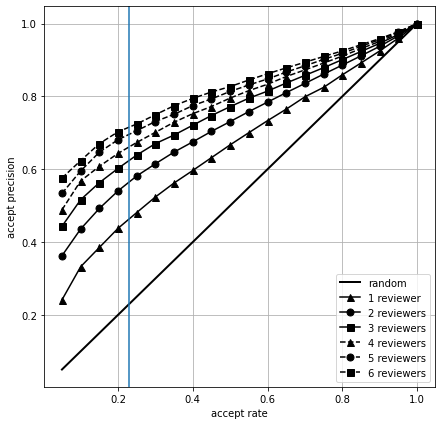

In [5]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
ax.set_prop_cycle(monochrome)

ax.plot(accept_rates, accept_rates, "k-", linewidth=2)
ax.plot(accept_rates, all_accepts.T, markersize=7)
ax.legend(['random', '1 reviewer', '2 reviewers', '3 reviewers', '4 reviewers', '5 reviewers', '6 reviewers'])
ax.set_xlabel("accept rate")
ax.set_ylabel("accept precision")
ax.axvline(0.23)
ax.grid(True)
mlai.write_figure(filename="accept-precision-vs-accept-rate.svg",
                  directory="./neurips/")

<img src="https://inverseprobability.com/talks/slides/diagrams//neurips/accept-precision-vs-accept-rate.svg" class="" width="50%" style="vertical-align:middle;">

Figure: <i>Plot of the accept rate vs the accept precision for the
conference for 50% subjectivity and different numbers of reviewers. The
grey line gives the NeurIPS accept rate for 2014 of 23%.</i>

In Figure we see the change in accept precision as we vary accept rate
and number of reviewers for a conference where reviewers are 50%
subjective.

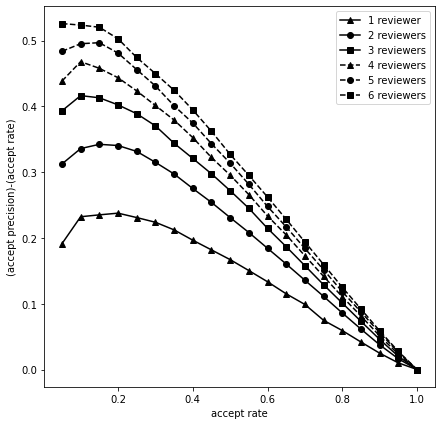

In [6]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
ax.set_prop_cycle(monochrome)
ax.plot(accept_rates, (all_accepts-accept_rates).T)
ax.legend(['1 reviewer', '2 reviewers', '3 reviewers', '4 reviewers', '5 reviewers', '6 reviewers'])
ax.set_xlabel("accept rate")
ax.set_ylabel("(accept precision)-(accept rate)")
mlai.write_figure(filename="gain-in-consistency.svg",
                  directory="./neurips/")

<img src="https://inverseprobability.com/talks/slides/diagrams//neurips/gain-in-consistency.svg" class="" width="50%" style="vertical-align:middle;">

Figure: <i>Plot of the accept rate vs gain in consistency over a random
conference for 50% subjectivity.</i>

Figure shows the accept rate against the gain in accept precision we
have over the random committee.

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References